Check that Potts model is solved correctly.  
Author: Eddie Lee, edl56@cornell.edu

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [38]:
plt.rc('font',size=15)

In [20]:
from coniii.solvers import Enumerate
from coniii.ising_eqn import ising_eqn_3_potts as ising
from coniii.utils import xpotts_states
from itertools import combinations

In [14]:
n = 3
k = 3
hJ = random.normal(size=n*k+n*(n-1)//2, scale=.2)

p = ising.p(hJ)
allStates = vstack(list(xpotts_states(n,k))).astype(int8)

In [59]:
# generate test sample
X = allStates[random.choice(range(k**n), p=p, size=100_000)]

In [60]:
sisj = zeros_like(hJ)
for k_ in range(k):
    for i in range(n):
        sisj[i+k_*n] = (X[:,i]==k_).mean()

for ijix,(i,j) in enumerate(combinations(range(n),2)):
    sisj[k*n+ijix] = (X[:,i]==X[:,j]).mean()

[(0, 1), (0, 1)]

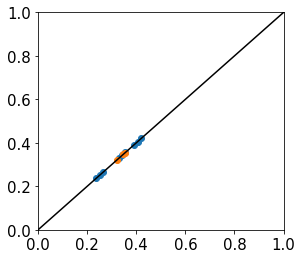

In [74]:
fig,ax=plt.subplots(figsize=(4.4,4))
ax.plot(ising.calc_observables(hJ)[:n*k], sisj[:n*k], 'o')
ax.plot(ising.calc_observables(hJ)[n*k:], sisj[n*k:], 'o')
ax.plot([0,1],'k-')
ax.set(xlim=(0,1),ylim=(0,1))

In [67]:
solver = Enumerate(n, calc_observables_multipliers=ising.calc_observables)
soln = solver.solve(constraints=sisj, full_output=True, max_param_value=10,
                    scipy_solver_kwargs={'method':'hybr'})

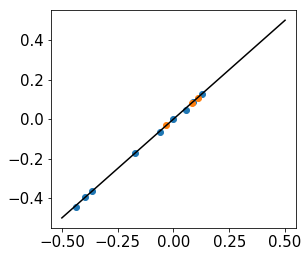

In [88]:
# parameters follow some translational symmetry
dh = soln[0][:k]-hJ[:k]
dh = tile(dh,3)

fig,ax=plt.subplots(figsize=(4.4,4))
ax.plot(hJ[:k*n],soln[0][:k*n]-dh,'o')
ax.plot(hJ[k*n:],soln[0][k*n:],'o')
ax.plot([-.5,.5],[-.5,.5],'k-')

[(0, 1), (0, 1)]

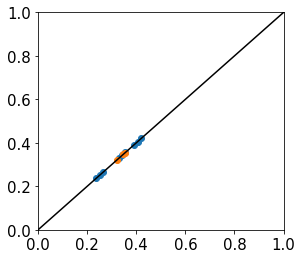

In [76]:
# the pairwise correlations
fig,ax=plt.subplots(figsize=(4.4,4))
ax.plot(ising.calc_observables(soln[0])[:n*k], sisj[:n*k], 'o')
ax.plot(ising.calc_observables(soln[0])[n*k:], sisj[n*k:], 'o')
ax.plot([0,1],'k-')
ax.set(xlim=(0,1),ylim=(0,1))